# **Hand Written Bengali Number Regongnition**

Our Approach
1. Build a digit(0-9) classifier using a CNN architecture.
2. Apply character segmentation for the handwritten number image.
3. Classify each segmented digit and then get the final number in the image.

In [19]:
# !pip install imutils
# pip install numpy
# !pip install pandas
# !pip install keras
# !pip install tensorflow
# !pip install opencv-python
# !pip install matplotlib
# !pip install sklearn
# !pip install graphviz

Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils.vis_utils import plot_model

In [3]:
dir = "D:\\4th_year_1st_semester\\AI-ML-LAB\Handwritten-Bangla-Number-Recognition-OCR\\Dataset"
train_data = []
val_data = []
img_size = 32
for i in os.listdir(dir):
    sub_directory = os.path.join(dir,i)
    counter=0
    for j in os.listdir(sub_directory):
        if counter%5!=0:
            img = cv2.imread(os.path.join(sub_directory,j),0)
            img = cv2.resize(img,(img_size,img_size))
            train_data.append([img,i])
        else:
            img = cv2.imread(os.path.join(sub_directory,j),0)
            img = cv2.resize(img,(img_size,img_size))
            val_data.append([img,i])
        counter=counter+1

print("Number of Training Data : ",len(train_data))
print("Number of validation Data : ",len(val_data))

Number of Training Data :  24546
Number of validation Data :  6141


In [5]:
random.shuffle(train_data)
random.shuffle(val_data)

In [6]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [7]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [6]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [8]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [9]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [10]:
print("Training dataset shape",train_X.shape,val_X.shape)
print("Training dataset shape",train_Y.shape,val_Y.shape)

Training dataset shape (24546, 32, 32, 1) (6141, 32, 32, 1)
Training dataset shape (24546,) (6141,)


In [11]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [18]:
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [16]:
history = model.fit(train_X,train_Y, epochs=20, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/20


ValueError: in user code:

    File "C:\Users\Debasish\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Debasish\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Debasish\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Debasish\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Debasish\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Debasish\AppData\Roaming\Python\Python310\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Debasish\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Debasish\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Debasish\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Debasish\AppData\Roaming\Python\Python310\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


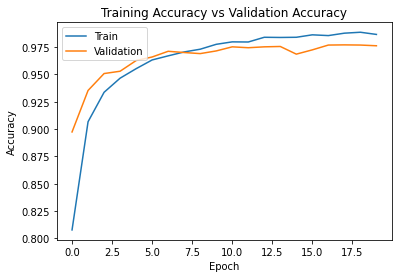

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

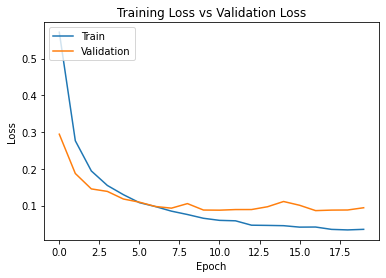

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [17]:
def get_degits(img):
    digits = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print("Gray scale",gray)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        digits.append(x)
    return digits, image


In [18]:
def get_number(digit):
    number = "".join(digit)
    return number

Gray scale [[150 150 150 ... 140 140 141]
 [150 150 150 ... 140 140 139]
 [150 150 150 ... 140 140 139]
 ...
 [146 146 146 ... 143 143 142]
 [146 146 146 ... 143 143 142]
 [146 146 146 ... 143 143 142]]
1/1 [==============================] - 0s 26ms/step
2017331011


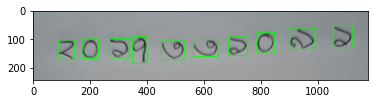

In [19]:
digit,image = get_degits("D:\\4th_year_1st_semester\\AI-ML-LAB\\Handwritten-Bangla-Number-Recognition-OCR\\evaluation\\2017331091.jpeg")
number = get_number(digit)
print(number)
plt.imshow(image)

In [1]:
digit,image = get_degits("D:\\4th_year_1st_semester\\AI-ML-LAB\\Handwritten-Bangla-Number-Recognition-OCR\\evaluation\\2017331024.jpeg")
number = get_number(digit)
print("Predicted Number",number)
plt.imshow(image)

NameError: name 'get_degits' is not defined

In [21]:
digit,image = get_degits("D:\\4th_year_1st_semester\\AI-ML-LAB\\Handwritten-Bangla-Number-Recognition-OCR\\evaluation\\2019331012_1.jpeg")
number = get_number(digit)
print(number)
plt.imshow(image)

Gray scale [[134 134 134 ... 138 137 137]
 [134 134 134 ... 137 137 137]
 [134 134 134 ... 137 137 136]
 ...
 [120 121 123 ... 130 129 128]
 [120 121 123 ... 130 129 128]
 [124 124 124 ... 129 126 123]]
1/1 [==============================] - 0s 23ms/step


TypeError: can only concatenate str (not "int") to str

In [ ]:
digit,image = get_degits("D:\\4th_year_1st_semester\\AI-ML-LAB\\Handwritten-Bangla-Number-Recognition-OCR\\evaluation\\2019331012_2.jpeg")
number = get_number(digit)
print(number)
plt.imshow(image)